In [1]:
import numpy as np
import pandas as pd

In [12]:
# df = pd.read_csv('/content/drive/MyDrive/Tugas SEM4/Penambangan Data/Projek Akhir/data_bdc_vector_fastext (1).csv')
df = pd.read_csv('/content/drive/MyDrive/Tugas SEM4/Penambangan Data/Projek Akhir/data_bdc_vector_fastext.csv')
df

,text,label,preprocessing,fasttext_vector
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,kunjung prabowo resmi serah proyek bantu air b...,"[0.21355506777763367, 0.2717653810977936, -0.1..."
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,anies tepuk tangan riah rektor wajib mata kuli...,"[0.15264499187469482, 0.11520598828792572, 0.0..."
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,sih dukung goblok dukung ridwan kamil skema ma...,"[-0.06176389008760452, 0.11771690100431442, -0..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,anies sikap kritis kerja prabowo anggap sopan ...,"[-0.013005102053284645, -0.18181253969669342, ..."
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,anies baswedan harap aparatur sipil negara mas...,"[0.0810462087392807, 0.09758785367012024, -0.1..."
...,...,...,...,...
4609,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik,lihat debat kemarin pas prabowo kicep keluarga...,"[0.025868095457553864, -0.029712989926338196, ..."
4610,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik,masyarakat prabowo gibran milik visi jalan asp...,"[0.14073508977890015, 0.06757435947656631, -0...."
4611,imo both are irrational but yg satu jauh lebih...,Ekonomi,imo both are irasional but irasional jujur but...,"[0.11683037132024765, -0.08101233094930649, -0..."
4612,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan,look that ganjar kecimpung lgislatif eksekutif...,"[0.03870995342731476, 0.058905720710754395, -0..."


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df.label.value_counts()

label
Politik                    2969
Sosial Budaya               425
Ideologi                    343
Pertahanan dan Keamanan     331
Ekonomi                     310
Sumber Daya Alam            156
Demografi                    61
Geografi                     19
Name: count, dtype: int64

In [ ]:
X_pca_df.label.value_counts()

label
negative    161
positive    139
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

y_raw = label_encoder.fit_transform(df_test.label)

# Menampilkan mapping dari label asli ke label yang telah dienkode
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)



{0: 'anger', 1: 'fear', 2: 'happy', 3: 'love', 4: 'sadness'}


## KNN Active Learning

In [5]:
# !pip install modAL
# !pip install typer<0.10.0
# !pip install --upgrade modAL
!pip install git+https://github.com/modAL-python/modAL.git

  Cloning https://github.com/modAL-python/modAL.git to /tmp/pip-req-build-bvkm_jrx
  Running command git clone --filter=blob:none --quiet https://github.com/modAL-python/modAL.git /tmp/pip-req-build-bvkm_jrx
  Resolved https://github.com/modAL-python/modAL.git to commit bba6f6fd00dbb862b1e09259b78caf6cffa2e755
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 3.8 MB/s eta 0:00:00
  Created wheel for modAL-python: filename=modAL_python-0.4.2-py3-none-any.whl size=32651 sha256=c90f0880a48b63f478c5a8ee7f14ad50f810bf8d8dfeb570c29400cc99f4e0c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-8c2ncdww/wheels/d9/fb/59/7deb61b460c1c36394cd093758986ff7d36f71352dcb2e02c5
Successfully built modAL-python


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Data Anda (gantilah ini dengan data sesuai dengan format Anda)
X = df.fasttext_vector
y = df.label

# Membagi data menjadi data pelatihan (80%) dan data pengujian (20%)
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=123)

# Menampilkan jumlah data
print("Jumlah data X_latih:", len(X_latih))
print("Jumlah data X_uji:", len(X_uji))
print("Jumlah data y_latih:", len(y_latih))
print("Jumlah data y_uji:", len(y_uji))


Jumlah data X_latih: 3691
Jumlah data X_uji: 923
Jumlah data y_latih: 3691
Jumlah data y_uji: 923


In [42]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import ast

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
def convert_to_array(vec_str):
    # Menghapus kurung siku di awal dan akhir string
    vec_str = vec_str.strip("[]")
    # Mengonversi string menjadi array numpy dengan memisahkan setiap elemen dengan spasi
    return np.fromstring(vec_str, sep=' ')

# Misalkan df.vec adalah Series di pandas yang berisi vektor sebagai string
X_raw = np.array([convert_to_array(x) for x in X_latih])
y_raw = label_encoder.fit_transform(y_latih)

X_test = np.array([convert_to_array(x) for x in X_uji])
y_test = label_encoder.fit_transform(y_uji)

print(X_raw.shape)
print(X_test.shape)

# Menampilkan mapping dari label asli ke label yang telah dienkode
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)

(3691, 1)
(923, 1)
{0: 'Demografi', 1: 'Ekonomi', 2: 'Geografi', 3: 'Ideologi', 4: 'Pertahanan dan Keamanan', 5: 'Politik', 6: 'Sosial Budaya', 7: 'Sumber Daya Alam'}


<ipython-input-42-a3617dd18db4>:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(vec_str, sep=' ')
<ipython-input-42-a3617dd18db4>:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(vec_str, sep=' ')


In [ ]:
X_raw

array([[ 0.28545073],
       [-0.66132224],
       [ 0.28545073],
       ...,
       [-0.51816386],
       [ 0.28545073],
       [-0.64103484]])

In [43]:
import numpy as np

# Diasumsikan X_raw dan y_raw sudah di-load dengan benar sebagai array NumPy

# Menentukan jumlah sampel yang dilabeli
n_labeled_examples = X_raw.shape[0]

# Memilih indeks secara acak untuk data pelatihan
training_indices = np.random.randint(low=0, high=n_labeled_examples, size=3)

# Menggunakan indeks untuk memisahkan X_train dan y_train
X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

# Mengisolasi contoh non-training yang akan kita query
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

print(X_train.shape[0])
print(X_pool.shape[0])


3
3688


In [44]:
training_indices

array([1526,  613, 2977])

In [45]:
y_train

array([5, 1, 0])

In [47]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

# Konversi X_train dari list ke array NumPy
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())

# model = MultinomialNB()
# model = SVC(probability=True)
# Specify our core estimator along with its active learning model.
knn = KNeighborsClassifier(n_neighbors=1)
learner = ActiveLearner(
    estimator=knn,
    X_training=X_train,
    y_training=y_train,
    query_strategy=uncertainty_sampling
)

In [48]:
data_validation = X_raw
predictions = learner.predict(data_validation)
is_correct = (predictions == y_raw)

len(predictions)

3691

In [49]:
# Menghitung jumlah prediksi yang benar
n_correct = np.sum(is_correct)
print("Jumlah jawaban yang benar:", n_correct)


Jumlah jawaban yang benar: 1849


In [50]:
import numpy as np

# Inisialisasi variabel yang diperlukan
unqueried_score = learner.score(data_validation, y_raw)
performance_history = [unqueried_score]

# Inisialisasi list untuk menyimpan data dan label yang di-query
queried_data = []
queried_labels = []

N_QUERIES = 1000
threshold = 0.0001  # Ambang batas perubahan minimal yang diinginkan
no_change_count = 0
max_no_change_count = 10  # Maksimal iterasi tanpa perubahan signifikan sebelum berhenti

for index in range(N_QUERIES):
    if len(X_pool) == 0:
        print("No more samples to query.")
        break

    query_index, query_instance = learner.query(X_pool)

    # Simpan data dan label yang di-query
    queried_data.append(X_pool[query_index].reshape(1, -1))
    queried_labels.append(y_pool[query_index])

    # Ajar model dengan data dan label yang di-query
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

    # Hapus instance yang di-query dari pool
    X_pool = np.delete(X_pool, query_index, axis=0)
    y_pool = np.delete(y_pool, query_index)

    # Hitung akurasi model
    current_accuracy = learner.score(data_validation, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=current_accuracy))

    # Periksa perubahan akurasi
    if index > 0 and abs(current_accuracy - performance_history[-1]) < threshold:
        no_change_count += 0
    else:
        no_change_count = 0  # Reset jika ada perubahan signifikan

    performance_history.append(current_accuracy)

    # Hentikan jika akurasi mencapai 100%
    if current_accuracy >= 1.0:
        print(f"Akurasi 100% dicapai setelah {index+1} iterasi.")
        break

    # Hentikan jika tidak ada perubahan signifikan dalam beberapa iterasi
    if no_change_count >= max_no_change_count:
        print(f"Konvergensi dicapai setelah {index+1} iterasi.")
        break

# Konversi queried_data dan queried_labels menjadi numpy array
queried_data = np.vstack(queried_data)
queried_labels = np.array(queried_labels)

# Sekarang queried_data dan queried_labels berisi data dan label yang di-query
print("Jumlah Data Pelatihan:", queried_data.shape[0])
# print("Queried labels shape:", queried_labels.shape)


Accuracy after query 1: 0.4974
Accuracy after query 2: 0.2373
Accuracy after query 3: 0.3018
Accuracy after query 4: 0.3536
Accuracy after query 5: 0.2704
Accuracy after query 6: 0.3308
Accuracy after query 7: 0.3487
Accuracy after query 8: 0.3723
Accuracy after query 9: 0.3723
Accuracy after query 10: 0.3723
Accuracy after query 11: 0.3731
Accuracy after query 12: 0.4300
Accuracy after query 13: 0.4384
Accuracy after query 14: 0.4508
Accuracy after query 15: 0.4530
Accuracy after query 16: 0.4549
Accuracy after query 17: 0.4749
Accuracy after query 18: 0.5018
Accuracy after query 19: 0.5467
Accuracy after query 20: 0.5467
Accuracy after query 21: 0.5373
Accuracy after query 22: 0.5373
Accuracy after query 23: 0.5373
Accuracy after query 24: 0.5373
Accuracy after query 25: 0.5373
Accuracy after query 26: 0.5207
Accuracy after query 27: 0.5207
Accuracy after query 28: 0.5207
Accuracy after query 29: 0.5207
Accuracy after query 30: 0.5207
Accuracy after query 31: 0.5115
Accuracy after qu

In [ ]:
len(X_pool)

716

In [ ]:
X_train

array([[-0.14342347],
       [-0.14342347],
       [-0.46891809]])

In [ ]:
queried_labels

array([[0]])

In [40]:
# Ubah array_1d menjadi bentuk (n, 1) agar bisa digabungkan dengan array_2d
X_train_1d_reshaped = X_train.reshape(-1, 1)
y_train_1d_reshaped = y_train.reshape(-1, 1)

# Gabungkan kedua array menggunakan np.vstack
result_array_data = np.vstack(( X_train_1d_reshaped,queried_labels))
result_array_labels = np.vstack(( y_train_1d_reshaped,queried_labels))

print(f'Total Data yang digunakan berjumlah {result_array_data.shape[0]}\nDengan label seperti\n {result_array_labels}')

Total Data yang digunakan berjumlah 104
Dengan label seperti
 [[7]
 [4]
 [3]
 [6]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [5]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [4]
 [5]
 [3]
 [5]
 [5]
 [5]
 [5]
 [5]
 [0]
 [5]
 [5]
 [4]
 [1]
 [5]
 [3]
 [5]
 [4]
 [6]
 [5]
 [5]
 [5]
 [1]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [1]
 [3]
 [4]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [4]
 [5]
 [6]
 [5]
 [5]
 [6]
 [1]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [3]
 [4]
 [5]
 [5]
 [5]
 [1]
 [6]
 [3]
 [5]
 [5]
 [3]
 [5]
 [5]
 [5]
 [5]
 [6]
 [1]
 [5]
 [1]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [3]
 [5]]


In [ ]:
from joblib import dump, load


# # Menyimpan model
# dump(learner.estimator, '/content/drive/MyDrive/Tugas SEM4/Penambangan Data/Projek Akhir/Knnactivelearning(sentimen).pkl')

# Memuat model
model= load('/content/drive/MyDrive/Tugas SEM4/Penambangan Data/Projek Akhir/Knnactivelearning(sentimen).pkl')


In [ ]:
X_test.shape

(180, 1)

In [ ]:
y_test.shape

(180,)

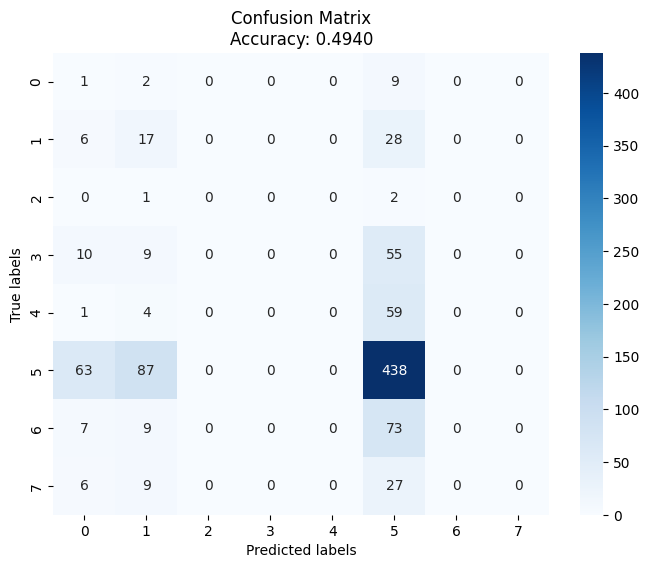

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)  # Ganti 'model' dengan model Anda

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Ganti 'y_test' dengan label yang benar dari data uji

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.4f}')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        97

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



## Predict

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tugas SEM4/Penambangan Data/Projek Akhir/data_kip_fasttext_vector.csv')
# df_test = pd.read_csv('/content/drive/MyDrive/Tugas SEM4/Penambangan Data/Projek Akhir/data_clean_fasttext_vector.csv')
df.head()

,data_clean,jenis,fasttext_vector,emosi,sentimen
0,orang tua pelit keluar duit didik anak ada pur...,kip,"[0.05560670420527458, -0.013611103408038616, -...",love,positif
1,tuju oke miskin pas terima kip cari hasil naik...,kip,"[-0.010047271847724915, 0.06066570058465004, -...",love,positif
2,orang salty tidak mau disaltyin,kip,"[0.10354461520910263, -0.34276601672172546, 0....",love,positif
3,nih baca ya warganet suci akun kip officialnya...,kip,"[-0.04936576634645462, -0.16087284684181213, 0...",anger,negatif
4,gaaa guyss kemrin habis obrol anak kip ngbroli...,kip,"[0.025940142571926117, -0.190103679895401, -0....",love,positif


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import ast

# Inisialisasi LabelEncoder
# label_encoder = LabelEncoder()
def convert_to_array(vec_str):
    # Menghapus kurung siku di awal dan akhir string
    vec_str = vec_str.strip("[]")
    # Mengonversi string menjadi array numpy dengan memisahkan setiap elemen dengan spasi
    return np.fromstring(vec_str, sep=' ')

# Misalkan df.vec adalah Series di pandas yang berisi vektor sebagai string
X_raw = np.array([convert_to_array(x) for x in df.fasttext_vector])
print(X_raw.shape)


(2786, 1)


<ipython-input-58-30c6456a66c6>:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(vec_str, sep=' ')


In [ ]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_raw)  # Ganti 'model' dengan model Anda

In [ ]:
df['sentimen2'] = y_pred
df.head()

,data_clean,jenis,fasttext_vector,emosi,sentimen,sentimen2
0,orang tua pelit keluar duit didik anak ada pur...,kip,"[0.05560670420527458, -0.013611103408038616, -...",love,positif,1
1,tuju oke miskin pas terima kip cari hasil naik...,kip,"[-0.010047271847724915, 0.06066570058465004, -...",love,positif,1
2,orang salty tidak mau disaltyin,kip,"[0.10354461520910263, -0.34276601672172546, 0....",love,positif,1
3,nih baca ya warganet suci akun kip officialnya...,kip,"[-0.04936576634645462, -0.16087284684181213, 0...",anger,negatif,1
4,gaaa guyss kemrin habis obrol anak kip ngbroli...,kip,"[0.025940142571926117, -0.190103679895401, -0....",love,positif,1


In [ ]:
# Dekode kembali nilai-nilai yang telah dienkode
decoded_labels = label_encoder.inverse_transform(df.sentimen2.values)
print("Decoded labels:", decoded_labels)

Decoded labels: ['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']


In [ ]:
df['sentimen2'] = decoded_labels

In [ ]:
df.head()

,data_clean,jenis,fasttext_vector,emosi,sentimen,sentimen2
0,orang tua pelit keluar duit didik anak ada pur...,kip,"[0.05560670420527458, -0.013611103408038616, -...",love,positif,positive
1,tuju oke miskin pas terima kip cari hasil naik...,kip,"[-0.010047271847724915, 0.06066570058465004, -...",love,positif,positive
2,orang salty tidak mau disaltyin,kip,"[0.10354461520910263, -0.34276601672172546, 0....",love,positif,positive
3,nih baca ya warganet suci akun kip officialnya...,kip,"[-0.04936576634645462, -0.16087284684181213, 0...",anger,negatif,positive
4,gaaa guyss kemrin habis obrol anak kip ngbroli...,kip,"[0.025940142571926117, -0.190103679895401, -0....",love,positif,positive


In [ ]:
def map_sentiment(label):
    positive_labels = ['love', 'happy']
    negative_labels = ['anger', 'sadness', 'fear']

    if label in positive_labels:
        return 'positif'
    elif label in negative_labels:
        return 'negatif'
    else:
        return 'netral'  # atau kategori lain yang Anda inginkan

# Terapkan fungsi map_sentiment ke kolom label
df['sentimen'] = df['emosi'].apply(map_sentiment)
df.head(10)

,data_clean,jenis,fasttext_vector,emosi,sentimen
0,orang tua pelit keluar duit didik anak ada pur...,kip,"[0.05560670420527458, -0.013611103408038616, -...",love,positif
1,tuju oke miskin pas terima kip cari hasil naik...,kip,"[-0.010047271847724915, 0.06066570058465004, -...",love,positif
2,orang salty tidak mau disaltyin,kip,"[0.10354461520910263, -0.34276601672172546, 0....",love,positif
3,nih baca ya warganet suci akun kip officialnya...,kip,"[-0.04936576634645462, -0.16087284684181213, 0...",anger,negatif
4,gaaa guyss kemrin habis obrol anak kip ngbroli...,kip,"[0.025940142571926117, -0.190103679895401, -0....",love,positif
5,deh kip undur nama muka viral sosial media dips,kip,"[0.11209850758314133, 0.06969597190618515, -0....",love,positif
6,terima kip menang lomba juta langsung lepas ki...,kip,"[0.041706014424562454, -0.015509015880525112, ...",love,positif
7,anak kip pakai bank rakyat indonesia ya pakai ...,kip,"[0.06299471855163574, 0.018556466326117516, -0...",love,positif
8,daftar kip gratis uji nasional bas komputer ya...,kip,"[0.051192138344049454, -0.030431075021624565, ...",love,positif
9,ya undur kip gali orang yowes rungkad,kip,"[0.07765472680330276, -0.10644925385713577, -0...",love,positif


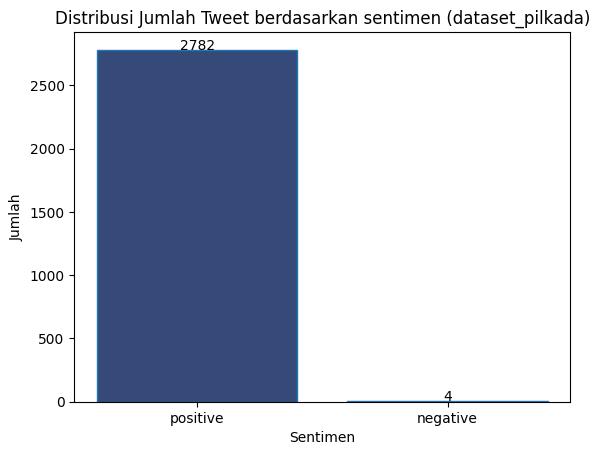

In [ ]:
import matplotlib.pyplot as plt

# Your existing code for sentiment counts
sentimen_counts = df['sentimen2'].value_counts()

labels = sentimen_counts.index
values = sentimen_counts.values

# Define two blue colors as a list
colors = ['#354a78', '#ff7272']  # Darker blue, Lighter blue

# Use the colors in the bar chart and set the edge color to a darker blue for contrast
plt.bar(labels, values, color=colors, edgecolor='#1f77b4')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Jumlah Tweet berdasarkan sentimen (dataset_pilkada)')

# Add text labels above the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center')

# Display the plot
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Tugas SEM4/Penambangan Data/Projek Akhir/data_kip_fasttext_vector.csv',index=False)

In [ ]:
# Filter DataFrame untuk mendapatkan baris dengan label 'negative'
negative_data_clean = df.loc[df['sentimen2'] == 'negative', 'data_clean']

print("\nData_clean with 'negative' label:")
print(negative_data_clean)


Data_clean with 'negative' label:
584                      pole man
776     orang respon harga sukses
1812              by the way kipk
2139          akibat blunder kipk
Name: data_clean, dtype: object


In [ ]:
df['data_clean'][3]#Iki ditebak Negatif

'nih baca ya warganet suci akun kip officialnya wajar situ koar koar urus orang'

In [ ]:
df['data_clean'][5]#Iki ditebak Negatif

'deh kip undur nama muka viral sosial media dips'